In [2]:
df = spark.read.parquet("s3://amazon-reviews-pds/parquet/product_category=Apparel/part-00000-495c48e6-96d6-4650-aa65-3c36a3516ddd.c000.snappy.parquet")

Calculation started (calculation_id=5ac3f9a5-eab4-eb27-57e5-d786b776a759) in (session=88c3f9a3-210c-0532-7cdf-257974843319). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


In [7]:
df.createOrReplaceTempView("people")
sqlDF = spark.sql("SELECT marketplace, customer_id, star_rating FROM people")
sqlDF.show()

Calculation started (calculation_id=70c3f9a8-fa01-d50b-fae1-362e6e95729f) in (session=88c3f9a3-210c-0532-7cdf-257974843319). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
+-----------+-----------+-----------+
|marketplace|customer_id|star_rating|
+-----------+-----------+-----------+
|         US|   51114360|          1|
|         US|   17052567|          5|
|         US|   50898608|          5|
|         US|     627263|          5|
|         US|   35515711|          4|
|         US|   53017806|          5|
|         US|   35360489|          5|
|         US|     451719|          5|
|         US|   35360489|          4|
|         US|   25693810|          5|
|         US|   36772555|          5|
|         US|   11144467|          4|
|         US|   34449191|          5|
|         US|   37989735|          1|
|         US|   52547797|          5|
|         US|   14964432|          1|
|         US|   52958624|          4|
|         US|   25982580|          3|
|         US|   52791587|          5|
|         US|   13134123|          2|
+-----------+-----------+-----------+
only showing top 20 rows



In [10]:
df.select("marketplace", "customer_id", "star_rating").show(10)

Calculation started (calculation_id=48c3f9a9-9f9e-b59d-0b6b-50d4c1c3593e) in (session=88c3f9a3-210c-0532-7cdf-257974843319). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
+-----------+-----------+-----------+
|marketplace|customer_id|star_rating|
+-----------+-----------+-----------+
|         US|   51114360|          1|
|         US|   17052567|          5|
|         US|   50898608|          5|
|         US|     627263|          5|
|         US|   35515711|          4|
|         US|   53017806|          5|
|         US|   35360489|          5|
|         US|     451719|          5|
|         US|   35360489|          4|
|         US|   25693810|          5|
+-----------+-----------+-----------+
only showing top 10 rows



In [11]:
df.select("star_rating").describe().show()

Calculation started (calculation_id=5ec3f9aa-10fa-0599-42ab-9be31b951306) in (session=88c3f9a3-210c-0532-7cdf-257974843319). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
+-------+------------------+
|summary|       star_rating|
+-------+------------------+
|  count|            589900|
|   mean| 4.105531446007798|
| stddev|1.2585715168061062|
|    min|                 1|
|    max|                 5|
+-------+------------------+



In [12]:
df_rate = df.select("star_rating").toPandas()

Calculation started (calculation_id=d4c3f9aa-5882-ed13-fb4e-d781a90d8664) in (session=88c3f9a3-210c-0532-7cdf-257974843319). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


In [15]:
import matplotlib.pyplot as plt

Calculation started (calculation_id=94c3f9aa-e56a-d212-e249-e0717957a800) in (session=88c3f9a3-210c-0532-7cdf-257974843319). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


Calculation started (calculation_id=c8c3f9ac-9a7d-fed1-f61b-7556a7f45be2) in (session=88c3f9a3-210c-0532-7cdf-257974843319). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


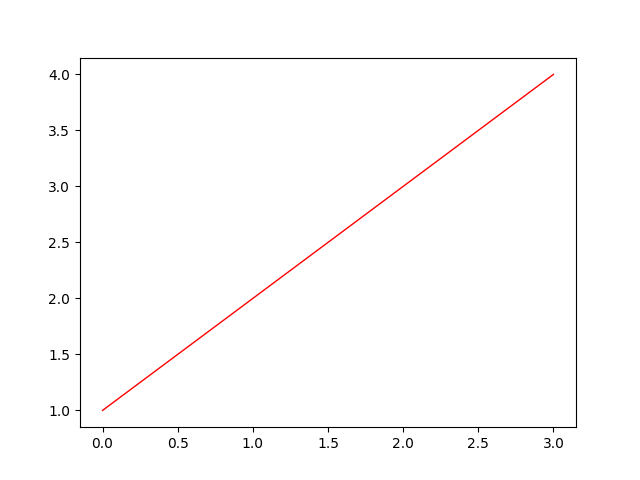

In [20]:
fig,ax = plt.subplots()
ax.plot([1,2,3,4], linewidth=1, color='r')
plt.show()
%matplot plt

In [33]:
rates = df_rate.values.flatten()

Calculation started (calculation_id=e0c3f9b0-922b-efbb-7f04-30ba3dca27cd) in (session=88c3f9a3-210c-0532-7cdf-257974843319). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


In [34]:
print(rates.shape)

Calculation started (calculation_id=eec3f9b0-ace9-bebd-8491-7c22d1807f9c) in (session=88c3f9a3-210c-0532-7cdf-257974843319). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
(589900,)



Calculation started (calculation_id=c0c3f9bb-7cd0-c4a9-bcbb-e2de2e75bf98) in (session=88c3f9a3-210c-0532-7cdf-257974843319). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


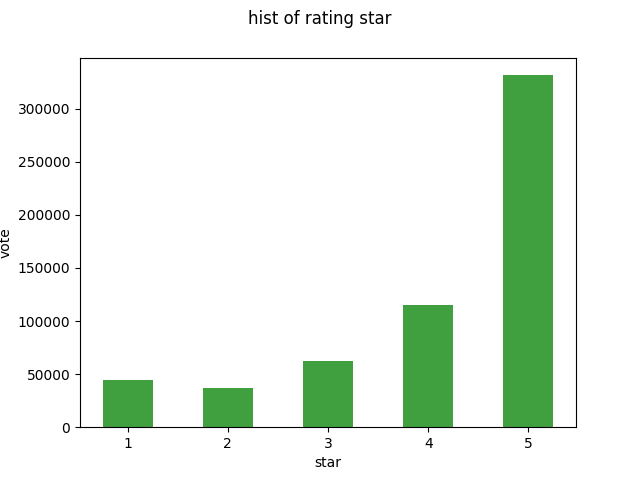

In [48]:
fig,ax = plt.subplots()
ax.hist(rates, [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],rwidth=0.5, color='green', alpha=0.75)
fig.suptitle('hist of rating star')
ax.set_xlabel('star')
ax.set_ylabel('vote')
plt.show()
%matplot plt 

In [71]:
print("{} with rating 1".format(sum(rates < 2)))
print("{} with rating 2".format(sum((rates>1) & (rates<3))))
print("{} with rating 3".format(sum((rates>2) & (rates<4))))
print("{} with rating 4".format(sum((rates>3) & (rates<5))))
print("{} with rating 5".format(sum((rates>4) & (rates<6))))

Calculation started (calculation_id=a2c3f9bf-8b3b-3811-e999-ab8bbc21789b) in (session=88c3f9a3-210c-0532-7cdf-257974843319). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
44368 with rating 1
36948 with rating 2
62307 with rating 3
114717 with rating 4
331560 with rating 5

